In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('full_rc_reagent_dispenses.csv')
# cleanup = df.drop(columns=['active_reagent_map', 'device_task_running', 'device_task_top_level'
#                            , 'error', 'instrument_name', 'is_simulated',
#        'local_ts', 'running_api_function', 'argus_runtime_uuid', 'carrier_id',
#        'creation_ts', 'exc_info',
#        'fc_sensor_data', 'metadata', 'uuid', 'is_lohms_override'])

# cleanup.to_csv('glacier_cleanup.csv')
df.head(400)
# df.columns

,active_reagent_map,device_task_running,device_task_top_level,device_task_view_id,error,instrument_name,is_simulated,local_ts,running_api_function,argus_runtime_uuid,...,metadata,post_weight_mg,pre_weight_mg,uuid,valve_num,weight_mg,volume_ul,reagent,dispense_lohms_psi_s_ul,is_lohms_override
0,SBL (pre-production),Pre-Prime Flush 1000ul,Sequencing Run,calibrate,NaN,glacier,False,2020-09-24T14:17:33.241152-04:00,NaN,68119856-95d2-4df3-b8a3-bf637fee993d,...,{},10201.180406,8703.456379,7ae186c8-63b1-4b8c-9b5f-23672f856e5a,17,1497.724027,1000,H2O,0.035000,True
1,SBL (pre-production),Prime check H2O prime_ul=2000 valve_num=17,Sequencing Run,calibrate,NaN,glacier,False,2020-09-24T14:17:52.399081-04:00,NaN,68119856-95d2-4df3-b8a3-bf637fee993d,...,{},13402.717159,10201.814299,d5c6a498-4718-4529-9403-ab06b7ed5ad0,17,3200.902859,2000,H2O,0.035000,True
2,SBL (pre-production),Pre-Prime Flush 1000ul,Sequencing Run,calibrate,NaN,glacier,False,2020-09-24T14:18:23.925582-04:00,NaN,68119856-95d2-4df3-b8a3-bf637fee993d,...,{},14931.421382,13490.488544,05926cef-94c0-403e-b7f2-91f48165556d,18,1440.932838,1000,WASH1E,0.035000,True
3,SBL (pre-production),Prime check WASH1E prime_ul=2000 valve_num=18,Sequencing Run,calibrate,NaN,glacier,False,2020-09-24T14:18:45.502827-04:00,NaN,68119856-95d2-4df3-b8a3-bf637fee993d,...,{},17919.865096,14929.414639,a876c44d-5dbb-4e73-89b1-1b748f7fefc7,18,2990.450458,2000,WASH1E,0.035000,True
4,SBL (pre-production),Pre-Prime Flush 1000ul,Sequencing Run,calibrate,NaN,glacier,False,2020-09-24T14:20:11.314365-04:00,NaN,68119856-95d2-4df3-b8a3-bf637fee993d,...,{},10197.748280,8729.533537,cb937d33-a9b0-48a5-bac2-daf4596faa8a,19,1468.214743,1000,_H2O19,0.035000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,SBL (pre-production),Prime check WASH1E prime_ul=75 valve_num=18,Sequencing Run,progress,NaN,glacier,False,2020-09-24T18:54:18.576704-04:00,NaN,5ffaf9ae-6e76-4540-b204-13a153db6e31,...,{},8778.259229,8702.412732,1082bb6e-de06-44f5-bb3f-13eb24e80b06,18,75.846496,75,WASH1E,0.024375,False
396,SBL (pre-production),Dispense WASH1E cycle 1/1,Sequencing Run,progress,NaN,glacier,False,2020-09-24T18:54:21.633295-04:00,fl_dispense_reagent_to_wells,5ffaf9ae-6e76-4540-b204-13a153db6e31,...,"{'slot_num': 1, 'well_num': 2}",9180.234803,8778.150662,b31f17a0-0a44-4e6b-814f-d3cb2d5df754,18,402.084141,400,WASH1E,0.024375,False
397,SBL (pre-production),Pre-Prime Dispense 5ul,Sequencing Run,progress,NaN,glacier,False,2020-09-24T18:54:39.370342-04:00,NaN,5ffaf9ae-6e76-4540-b204-13a153db6e31,...,{},8675.067789,8668.823420,1ff6d0ee-d338-4a3d-b51d-4cfc965170e5,18,6.244369,5,WASH1E,0.024375,False
398,SBL (pre-production),Prime check WASH1E prime_ul=75 valve_num=18,Sequencing Run,progress,NaN,glacier,False,2020-09-24T18:54:41.792315-04:00,NaN,5ffaf9ae-6e76-4540-b204-13a153db6e31,...,{},8750.388960,8674.833143,09811d08-57b2-401d-9a5a-a434952c7dd3,18,75.555816,75,WASH1E,0.024375,False


In [3]:
valves = df.groupby(['reagent', 'device_task_view_id', 'dispense_type'])['duration_ms'].describe()
valves.head(20)

count          mean           std  \
reagent device_task_view_id dispense_type                                      
CLEAVE1 calibrate           flush            2.0  14248.000000    117.379726   
                            reagent          2.0   7840.500000     62.932504   
        prep_reagents       flush            2.0   5757.000000   3486.036431   
                            reagent          3.0   1728.333333   2438.365094   
        progress            flush            6.0   3326.833333      5.741661   
                            reagent         36.0   1219.944444    658.607359   
CLEAVE2 calibrate           flush            2.0  14310.500000     10.606602   
                            reagent          2.0   7874.000000      4.242641   
        prep_reagents       flush            2.0   6083.000000   3684.026330   
                            reagent          3.0   1824.000000   2578.641697   
        progress            flush            6.0   3481.166667      6.177918   
                            reagent         36.0   1276.250000    688.990457   
H2O     calibrate           flush            2.0  13957.500000     98.287843   
                            reagent          4.0  14652.500000  15355.654474   
        prep_reagents       flush            2.0   6203.000000   3749.080154   
                            reagent          4.0   4787.750000   8632.806511   
        progress            reagent         28.0   1372.285714      3.885940   
        roi_selection       reagent          8.0   1374.000000      2.329929   
IMGBUF  calibrate           flush            2.0  14288.500000     30.405592   
                            reagent          4.0   4825.000000   3507.567343   

                                               min       25%      50%  \
reagent device_task_view_id dispense_type                               
CLEAVE1 calibrate           flush          14165.0  14206.50  14248.0   
                            reagent         7796.0   7818.25   7840.5   
        prep_reagents       flush           3292.0   4524.50   5757.0   
                            reagent           41.0    330.50    620.0   
        progress            flush           3317.0   3325.50   3327.0   
                            reagent           41.0    624.00   1663.0   
CLEAVE2 calibrate           flush          14303.0  14306.75  14310.5   
                            reagent         7871.0   7872.50   7874.0   
        prep_reagents       flush           3478.0   4780.50   6083.0   
                            reagent           43.0    345.50    648.0   
        progress            flush           3471.0   3479.25   3481.0   
                            reagent           43.0    653.00   1739.0   
H2O     calibrate           flush          13888.0  13922.75  13957.5   
                            reagent         1338.0   1362.75  14589.5   
        prep_reagents       flush           3552.0   4877.50   6203.0   
                            reagent           46.0    527.50    688.0   
        progress            reagent         1363.0   1368.75   1374.0   
        roi_selection       reagent         1370.0   1373.25   1374.5   
IMGBUF  calibrate           flush          14267.0  14277.75  14288.5   
                            reagent         1747.0   1807.75   4840.5   

                                                75%      max  
reagent device_task_view_id dispense_type                     
CLEAVE1 calibrate           flush          14289.50  14331.0  
                            reagent         7862.75   7885.0  
        prep_reagents       flush           6989.50   8222.0  
                            reagent         2572.00   4524.0  
        progress            flush           3330.75   3333.0  
                            reagent         1663.00   1667.0  
CLEAVE2 calibrate           flush          14314.25  14318.0  
                            reagent         7875.50   7877.0  
        prep_reagents       flush           7

In [4]:
task = df.groupby('device_task_view_id').describe()
task

error                              duration_ms  \
                    count mean std min 25% 50% 75% max       count   
device_task_view_id                                                  
calibrate             0.0  NaN NaN NaN NaN NaN NaN NaN        86.0   
prep_reagents         0.0  NaN NaN NaN NaN NaN NaN NaN       111.0   
progress              0.0  NaN NaN NaN NaN NaN NaN NaN      2022.0   
roi_selection         0.0  NaN NaN NaN NaN NaN NaN NaN       240.0   

                                   ... volume_ul          \
                             mean  ...       75%     max   
device_task_view_id                ...                     
calibrate            12249.372093  ...    1000.0  2000.0   
prep_reagents         4131.405405  ...     550.0  2000.0   
progress              2554.677547  ...     400.0   400.0   
roi_selection         1850.579167  ...     400.0   400.0   

                    dispense_lohms_psi_s_ul                                \
                                      count      mean       std       min   
device_task_view_id                                                         
calibrate                              86.0  0.034164  0.003087  0.021298   
prep_reagents                         111.0  0.024137  0.004835  0.019457   
progress                             2022.0  0.024430  0.002640  0.020259   
roi_selection                         240.0  0.024116  0.000588  0.022369   

                                                             
                          25%       50%       75%       max  
device_task_view_id                                          
calibrate            0.035000  0.035000  0.035000  0.035000  
prep_reagents        0.021197  0.022934  0.024375  0.043016  
progress             0.024375  0.024375  0.024375  0.043016  
roi_selection        0.024375  0.024375  0.024375  0.024375  

[4 rows x 72 columns]

In [5]:
# df_roi = df.loc[df['device_task_view_id'] == 'roi_selection']

In [6]:
df_runtime = df.loc[(df['device_task_view_id'] != 'calibrate') & (df['dispense_type'] == 'reagent') & (df['volume_ul'] > 75)]

In [17]:
sums = df_runtime.groupby('reagent', as_index=False).sum()
sums = sums.drop([2, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [18]:
sums

,reagent,error,is_simulated,duration_ms,exc_info,post_weight_mg,pre_weight_mg,valve_num,weight_mg,volume_ul,dispense_lohms_psi_s_ul,is_lohms_override
0,CLEAVE1,0.0,0,44448,0.0,2.344603e+05,2.296651e+05,200,4795.157199,5350,0.506466,0
1,CLEAVE2,0.0,0,46547,0.0,2.402266e+05,2.348036e+05,400,5422.994723,5350,0.529930,0
3,IMGBUF,0.0,0,140249,0.0,3.586237e+05,3.440586e+05,518,14565.087392,14950,0.848553,0
4,MORPH_HYB,0.0,0,11320,0.0,4.702841e+04,4.590847e+04,25,1119.941444,1350,0.102998,0
5,N0_PRIMER,0.0,0,13108,0.0,5.487826e+04,5.345235e+04,20,1425.908529,1350,0.119147,0
6,SASC5X,0.0,0,21102,0.0,8.782434e+04,8.582954e+04,63,1994.801029,2150,0.216188,0
7,SEQMIX,0.0,0,80104,0.0,2.037387e+05,1.984066e+05,126,5332.074887,4550,0.903345,0
8,WASH1E,0.0,0,3627754,0.0,8.794352e+06,8.440288e+06,16290,354063.699220,363600,22.059217,0


C:\Users\ericevje\Anaconda3\envs\cs109a\lib\site-packages\ipykernel_launcher.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  """


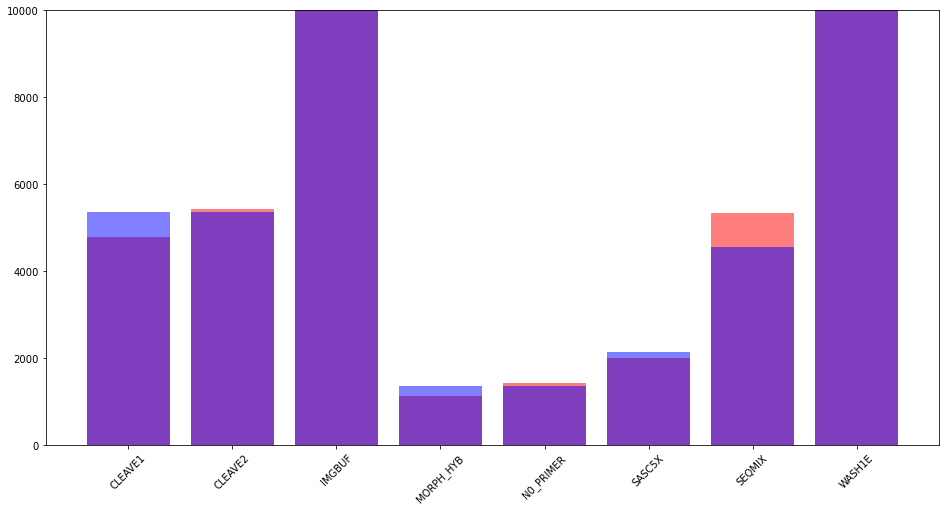

In [23]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(sums['reagent'], sums['weight_mg'], color='r', alpha=0.5)
ax.bar(sums['reagent'], sums['volume_ul'], color='b', alpha=0.5)
ax.set(ylim=(0, 10000))
ax.set_xticklabels(sums['reagent'], rotation=45)

plt.show()

In [24]:
sums['per_error'] = (sums['weight_mg'] - sums['volume_ul']) / sums['volume_ul']


C:\Users\ericevje\Anaconda3\envs\cs109a\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


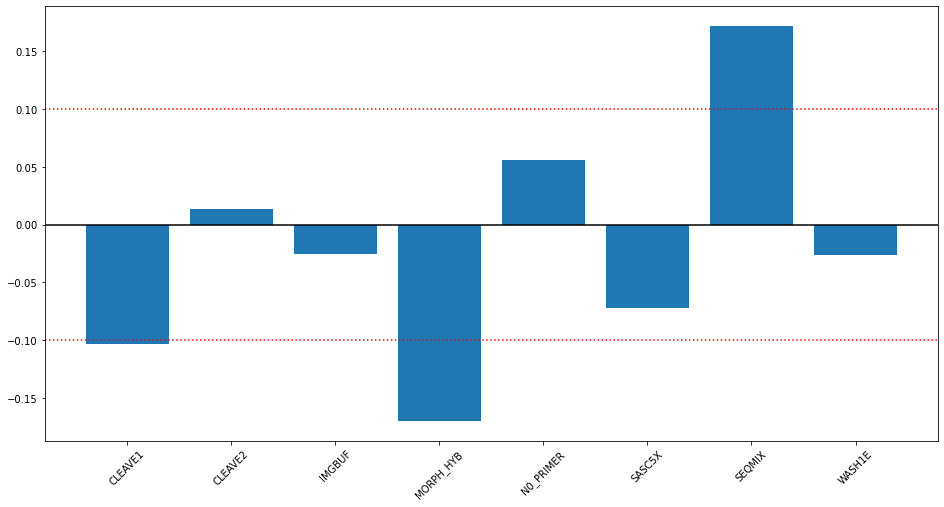

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(sums['reagent'], sums['per_error'])
ax.axhline(0.1, color='r', linestyle=':')
ax.axhline(-0.1, color='r', linestyle=':')
ax.axhline(0, color='k', linestyle='-')
ax.set_xticklabels(sums['reagent'], rotation=45)

plt.show()

In [34]:
by_part = df_runtime.groupby(['reagent', 'device_task_view_id'], as_index=False).sum()
by_part = by_part.drop([4, 5, 6, 21, 22, 23, 24, 25 ,26, 27, 28, 29, 30, 31])

In [35]:
by_part

,reagent,device_task_view_id,error,is_simulated,duration_ms,exc_info,post_weight_mg,pre_weight_mg,valve_num,weight_mg,volume_ul,dispense_lohms_psi_s_ul,is_lohms_override
0,CLEAVE1,prep_reagents,0.0,0,4524,0.0,1.624227e+04,1.578542e+04,8,456.851076,550,0.020259,0
1,CLEAVE1,progress,0.0,0,39924,0.0,2.182180e+05,2.138797e+05,192,4338.306123,4800,0.486208,0
2,CLEAVE2,prep_reagents,0.0,0,4781,0.0,1.558911e+04,1.511225e+04,16,476.865978,550,0.021197,0
3,CLEAVE2,progress,0.0,0,41766,0.0,2.246375e+05,2.196914e+05,384,4946.128745,4800,0.508733,0
7,IMGBUF,prep_reagents,0.0,0,5163,0.0,1.195115e+04,1.140702e+04,14,544.128656,550,0.022934,0
8,IMGBUF,progress,0.0,0,105041,0.0,2.558466e+05,2.448914e+05,392,10955.243143,11200,0.642148,0
9,IMGBUF,roi_selection,0.0,0,30045,0.0,9.082598e+04,8.776027e+04,112,3065.715594,3200,0.183471,0
10,MORPH_HYB,prep_reagents,0.0,0,4581,0.0,1.005945e+04,9.641604e+03,5,417.843907,550,0.020600,0
11,MORPH_HYB,progress,0.0,0,6739,0.0,3.696897e+04,3.626687e+04,20,702.097537,800,0.082399,0
12,N0_PRIMER,prep_reagents,0.0,0,5288,0.0,1.717322e+04,1.658992e+04,4,583.303930,550,0.023829,0


In [36]:
by_part['per_error'] = (by_part['weight_mg'] - by_part['volume_ul']) / by_part['volume_ul']
by_part

,reagent,device_task_view_id,error,is_simulated,duration_ms,exc_info,post_weight_mg,pre_weight_mg,valve_num,weight_mg,volume_ul,dispense_lohms_psi_s_ul,is_lohms_override,per_error
0,CLEAVE1,prep_reagents,0.0,0,4524,0.0,1.624227e+04,1.578542e+04,8,456.851076,550,0.020259,0,-0.169362
1,CLEAVE1,progress,0.0,0,39924,0.0,2.182180e+05,2.138797e+05,192,4338.306123,4800,0.486208,0,-0.096186
2,CLEAVE2,prep_reagents,0.0,0,4781,0.0,1.558911e+04,1.511225e+04,16,476.865978,550,0.021197,0,-0.132971
3,CLEAVE2,progress,0.0,0,41766,0.0,2.246375e+05,2.196914e+05,384,4946.128745,4800,0.508733,0,0.030443
7,IMGBUF,prep_reagents,0.0,0,5163,0.0,1.195115e+04,1.140702e+04,14,544.128656,550,0.022934,0,-0.010675
8,IMGBUF,progress,0.0,0,105041,0.0,2.558466e+05,2.448914e+05,392,10955.243143,11200,0.642148,0,-0.021853
9,IMGBUF,roi_selection,0.0,0,30045,0.0,9.082598e+04,8.776027e+04,112,3065.715594,3200,0.183471,0,-0.041964
10,MORPH_HYB,prep_reagents,0.0,0,4581,0.0,1.005945e+04,9.641604e+03,5,417.843907,550,0.020600,0,-0.240284
11,MORPH_HYB,progress,0.0,0,6739,0.0,3.696897e+04,3.626687e+04,20,702.097537,800,0.082399,0,-0.122378
12,N0_PRIMER,prep_reagents,0.0,0,5288,0.0,1.717322e+04,1.658992e+04,4,583.303930,550,0.023829,0,0.060553


In [37]:
by_part['condition'] = by_part['reagent'] + by_part['device_task_view_id']
by_part

,reagent,device_task_view_id,error,is_simulated,duration_ms,exc_info,post_weight_mg,pre_weight_mg,valve_num,weight_mg,volume_ul,dispense_lohms_psi_s_ul,is_lohms_override,per_error,condition
0,CLEAVE1,prep_reagents,0.0,0,4524,0.0,1.624227e+04,1.578542e+04,8,456.851076,550,0.020259,0,-0.169362,CLEAVE1prep_reagents
1,CLEAVE1,progress,0.0,0,39924,0.0,2.182180e+05,2.138797e+05,192,4338.306123,4800,0.486208,0,-0.096186,CLEAVE1progress
2,CLEAVE2,prep_reagents,0.0,0,4781,0.0,1.558911e+04,1.511225e+04,16,476.865978,550,0.021197,0,-0.132971,CLEAVE2prep_reagents
3,CLEAVE2,progress,0.0,0,41766,0.0,2.246375e+05,2.196914e+05,384,4946.128745,4800,0.508733,0,0.030443,CLEAVE2progress
7,IMGBUF,prep_reagents,0.0,0,5163,0.0,1.195115e+04,1.140702e+04,14,544.128656,550,0.022934,0,-0.010675,IMGBUFprep_reagents
8,IMGBUF,progress,0.0,0,105041,0.0,2.558466e+05,2.448914e+05,392,10955.243143,11200,0.642148,0,-0.021853,IMGBUFprogress
9,IMGBUF,roi_selection,0.0,0,30045,0.0,9.082598e+04,8.776027e+04,112,3065.715594,3200,0.183471,0,-0.041964,IMGBUFroi_selection
10,MORPH_HYB,prep_reagents,0.0,0,4581,0.0,1.005945e+04,9.641604e+03,5,417.843907,550,0.020600,0,-0.240284,MORPH_HYBprep_reagents
11,MORPH_HYB,progress,0.0,0,6739,0.0,3.696897e+04,3.626687e+04,20,702.097537,800,0.082399,0,-0.122378,MORPH_HYBprogress
12,N0_PRIMER,prep_reagents,0.0,0,5288,0.0,1.717322e+04,1.658992e+04,4,583.303930,550,0.023829,0,0.060553,N0_PRIMERprep_reagents


C:\Users\ericevje\Anaconda3\envs\cs109a\lib\site-packages\ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  


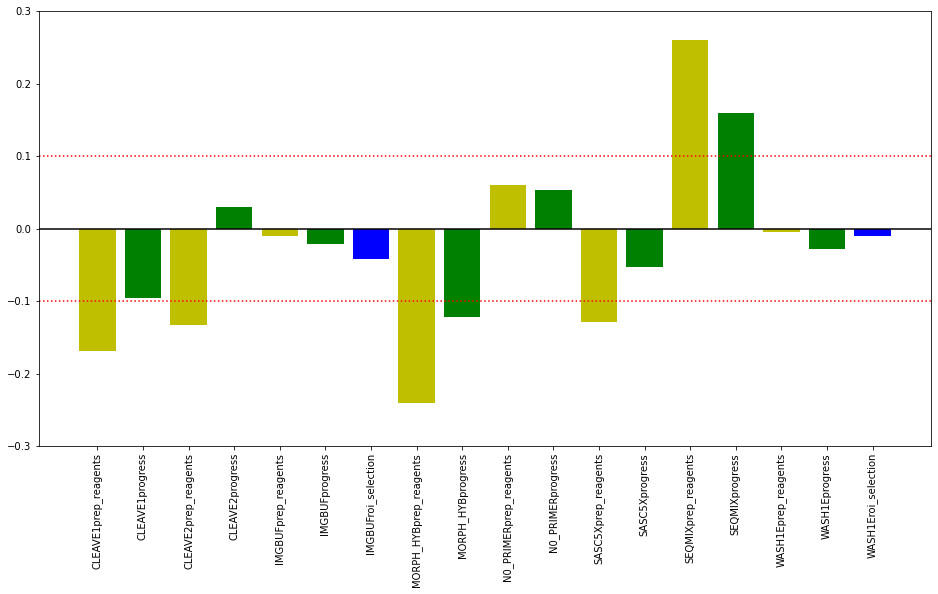

In [38]:
color_dict = {'prep_reagents':'y', 'roi_selection':'b', 'progress':'g'}
by_part['colors'] = by_part['device_task_view_id'].apply(lambda x: color_dict[x])
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(by_part['condition'], by_part['per_error'], color = by_part['colors'])
ax.axhline(0.1, color='r', linestyle=':')
ax.axhline(-0.1, color='r', linestyle=':')
ax.axhline(0, color='k', linestyle='-')
ax.set_xticklabels(by_part['condition'], rotation=90)
ax.set(ylim=(-0.3, 0.3))

plt.show()